In [236]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd

### read csv

In [237]:
dolph_edges_df = pd.read_csv("D:/Pum_Program/HDS_WORK/Year 3/Semester 1/Data sci/Lab week 4  lecture3/dolphin_edges.csv")

In [238]:
dolph_vertices_df = pd.read_csv("D:/Pum_Program/HDS_WORK/Year 3/Semester 1/Data sci/Lab week 4  lecture3/dolphin_vertices.csv")

In [239]:
dolph_edges = nx.from_pandas_edgelist(dolph_edges_df, source="From", target="To", create_using = nx.MultiDiGraph)

In [240]:
dolph_edges

In [241]:
print(nx.info(dolph_edges) )

Name: 
Type: MultiDiGraph
Number of nodes: 62
Number of edges: 159
Average in degree:   2.5645
Average out degree:   2.5645


In [242]:
dolph_edges

## 1. Who are the most popular ?

In [243]:
popular_dolph = pd.DataFrame(dolph_edges.in_degree(),columns=["Node","Degree"])

In [244]:
popular_dolph.sort_values(by="Degree",ascending = False).head()

,Node,Degree
49,Trigger,9
56,Web,9
43,Topless,8
35,SN4,7
38,SN9,7


### ANS : Web & Trigger are the most of popular because they have in_degree most
### Explain: in_degree define as the number of node interacted  

## 2. Pick 2 individuals, find the shortest path between them

### Pick Oscar to Triger

In [245]:
dolph_edges_df["Weight"] = 1

In [246]:
dolph_edges_df.head()

,From,To,Weight
0,CCL,Double,1
1,DN16,Feather,1
2,DN21,Feather,1
3,Beak,Fish,1
4,Bumper,Fish,1


In [247]:
dolph_weight_graph = nx.from_pandas_edgelist(dolph_edges_df, source="From", target ="To",edge_attr ="Weight"
                                             ,create_using = nx.MultiDiGraph)

In [248]:
dolph_weight_graph

In [249]:
nx.shortest_path(dolph_weight_graph,'Oscar','Trigger',weight="Weight")

['Oscar', 'PL', 'SN96', 'TR99', 'Trigger']

### the path of 'Oscar' to 'Triger' has 4 weight

In [250]:
nx.shortest_path(dolph_weight_graph,'Oscar',weight="Weight") ### shortest path to other node of Oscar

{'Oscar': ['Oscar'],
 'PL': ['Oscar', 'PL'],
 'TR77': ['Oscar', 'TR77'],
 'SN96': ['Oscar', 'PL', 'SN96'],
 'TR99': ['Oscar', 'PL', 'SN96', 'TR99'],
 'Trigger': ['Oscar', 'PL', 'SN96', 'TR99', 'Trigger'],
 'Vau': ['Oscar', 'PL', 'SN96', 'TR99', 'Trigger', 'Vau']}

## 3. What does the shortest path mean ?

### ANS : For social network data its mean the shortest path that least of pass through the other node                   for communication with destination node (same weight of all edges) 
### เส้นทางที่เราสามารถติดต่อกับ node อื่นได้สั้นที่สุด
### เช่น A สามารถติดต่อกับ B ได้ 
### B สามารถติดต่อกับ C ได้ หาก A ต้องการติดต่อกับ C ก็สามารถไปหา B เพื่อต้องการไปติดต่อกับ C
### ซึ่งแน่นอนว่าอาจจะมีหลายเส้นทางที่จะติดต่อไปหา C ไม่ใช่แค่ผ่าน B แต่เราจะหาเส้นทางที่ระยะสั้นที่สุดในการติดต่อ โดยที่ไม่ต้องติดต่อกันหลาย node (กรณี Weight เท่ากันทุก Edge)

## 4. Find how many components are there in the network

In [251]:
dolph_edges_df

,From,To,Weight
0,CCL,Double,1
1,DN16,Feather,1
2,DN21,Feather,1
3,Beak,Fish,1
4,Bumper,Fish,1
...,...,...,...
154,Topless,Zap,1
155,Ripplefluke,Zig,1
156,Bumper,Zipfel,1
157,SN4,Zipfel,1


In [252]:
dolph_components = nx.from_pandas_edgelist(dolph_edges_df, source="From", target="To",edge_attr="Weight")

In [253]:
components = [x for x in nx.connected_components(dolph_components)]
len(components)

1

In [254]:
print(components)

[{'Stripes', 'TR77', 'Haecksel', 'Feather', 'Jonah', 'Grin', 'Cross', 'Beescratch', 'Jet', 'TR120', 'Upbang', 'Bumper', 'Quasi', 'Topless', 'MN105', 'SN4', 'Web', 'TR99', 'Whitetip', 'MN83', 'Double', 'Kringel', 'SMN5', 'Thumper', 'Notch', 'Beak', 'Zig', 'DN16', 'PL', 'SN89', 'MN23', 'Knit', 'Oscar', 'TSN103', 'TSN83', 'CCL', 'TR88', 'SN96', 'Zipfel', 'Fish', 'Zap', 'SN100', 'Patchback', 'SN90', 'Fork', 'Gallatin', 'SN63', 'Scabs', 'Shmuddel', 'Mus', 'Wave', 'MN60', 'DN63', 'Ripplefluke', 'DN21', 'TR82', 'Trigger', 'Number1', 'Hook', 'Vau', 'SN9', 'Five'}]


In [255]:
list_vertices = dolph_vertices_df["Name"].values

In [256]:
component_df = pd.DataFrame(columns = list_vertices, index = list_vertices)

In [257]:
component_df

,Beak,Beescratch,Bumper,CCL,Cross,DN16,DN21,DN63,Double,Feather,...,TSN103,TSN83,Upbang,Vau,Wave,Web,Whitetip,Zap,Zig,Zipfel
Beak,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Beescratch,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Bumper,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CCL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Cross,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Web,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Whitetip,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Zap,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Zig,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [258]:
list_node = list(dolph_edges_df["From"].values)
list_to_node = list(dolph_edges_df["To"].values)

In [259]:
fill_compo = list( zip(a,b))

In [260]:
component_df

,Beak,Beescratch,Bumper,CCL,Cross,DN16,DN21,DN63,Double,Feather,...,TSN103,TSN83,Upbang,Vau,Wave,Web,Whitetip,Zap,Zig,Zipfel
Beak,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Beescratch,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Bumper,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CCL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Cross,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Web,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Whitetip,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Zap,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Zig,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [261]:
## Preparing Data
list1  = []
list2 = []
for i in fill_compo:
    list1.append(i[0])
    list2.append(i[1])
   

In [262]:
### Fill adjacent
for i in range(len(list1)):
    component_df.loc[list1[i],list2[i]] = 1

In [263]:
component_df.fillna(0,inplace=True)

In [264]:
G = nx.from_pandas_adjacency(component_df)

In [265]:
G

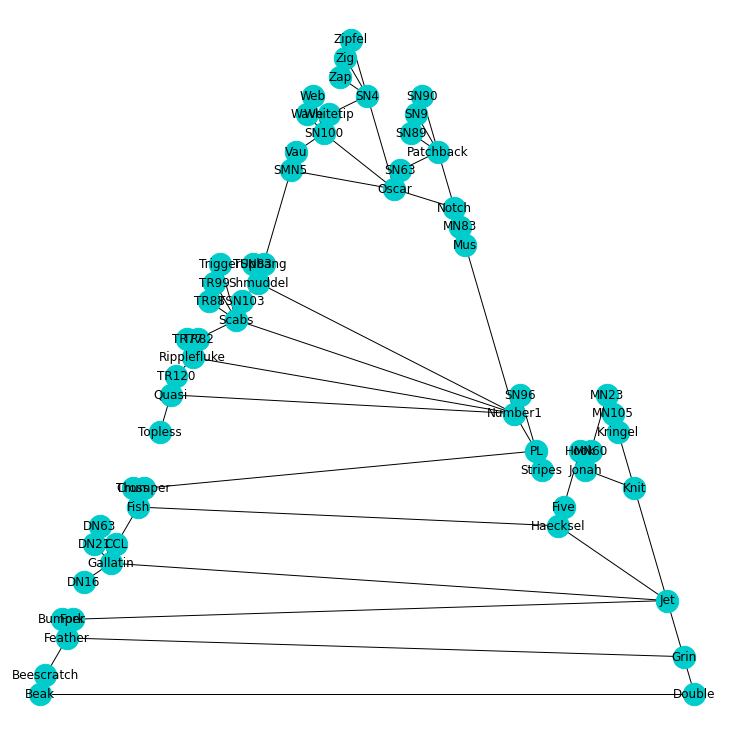

In [281]:
plt.figure(3,figsize=(10,10))
nx.draw_planar(G, with_labels=True, node_size=500, node_color='#00CCCC')

### ANS : this graph has 1 component